## HW 5-1

### question
Use Python and the requests library to send a GET request to the Central Weather Bureau (CWB) website: https://opendata.cwa.gov.tw/dataset/forecast/F-A0010-001.
Retrieve the HTML content of the webpage.
Save the HTML content as a file named "datapage.html".

### 解決辦法
使用它（氣象局網站）給的api解決
like below
url = 'https://opendata.cwb.gov.tw/fileapi/v1/opendataapi/F-A0010-001?Authorization= here is where to place&downloadType=WEB&format=JSON'
**注意** 因為氣象局升格為氣象屬所以網域不一樣了！！
cwb -> cwa

Authorization =CWA-D84CD2FF-DF67-4935-94F5-7AA1F0D90A8F


In [6]:
import requests

def dowload(url, save_path):
    
    headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.103 Safari/537.36'
    }   
    response = requests.get(url)
    if response.status_code == 200:
        with open(save_path, 'wb') as f:
            f.write(response.content)
        print("Image downloaded successfully!")
    else:
        print("Failed to download image.")
    return response

url = 'https://opendata.cwa.gov.tw/fileapi/v1/opendataapi/F-A0010-001?Authorization=CWA-D84CD2FF-DF67-4935-94F5-7AA1F0D90A8F&downloadType=WEB&format=JSON'

r = dowload(url,'datapage.html')
r.encoding = 'utf-8'
print(r.text)

Image downloaded successfully!
{
 "cwaopendata": {
  "@xmlns": "urn:cwa:gov:tw:cwacommon:0.1",
  "identifier": "472c7047-eb48-4aa1-8fc0-9be46a234889",
  "datasetName": "一週農業氣象預報",
  "dataid": "F-A0010-001",
  "sender": "shchiang@cwa.gov.tw",
  "sent": "2024-04-26T18:15:02+08:00",
  "status": "Actual",
  "scope": "Public",
  "msgType": "Issue",
  "resources": {
   "resource": {
    "metadata": {
     "resourceName": "中央氣象署氣候服務_農業氣象一週預報",
     "resourceDescription": "提供氣象署預報資料和農事建議，供農業相關單位及農民參考",
     "language": "zh",
     "homepage": "https://www.cwa.gov.tw/V8/C/L/agriculture.html",
     "sources": {
      "source": [
       {
        "title": "1週預報",
        "path": "https://www.cwa.gov.tw/V8/C/W/week.html"
       },
       {
        "title": "長期天氣預報-季長期天氣展望",
        "path": "https://www.cwa.gov.tw/Data/fcst_pdf/FW15.pdf"
       }
      ]
     },
     "temporal": {
      "issueTime": "2024-04-26T17:00:00+08:00",
      "validTime": {
       "startTime": "2024-04-27T00:00:00+08:00",
  

## HW5-2
### question
1. Analyze the "datapage.html" file to extract the temperature information for the upcoming week.
2. Process the HTML content to extract the relevant temperature data.
3. Organize the temperature data in a suitable data structure for further processing.

### chatgpt prompt(咒言)
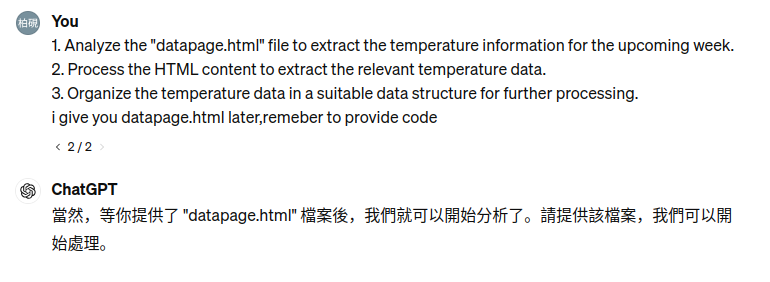

In [1]:
import json

# 讀取 JSON 檔案
with open("datapage.html", "r", encoding="utf-8") as f:
    json_data = json.load(f)

# 定義一個遞迴函式，用於印出 JSON 結構
def print_json_structure(data, indent=0):
    for key, value in data.items():
        print(" " * indent + key)
        if isinstance(value, dict):
            print_json_structure(value, indent + 4)

# 列印 JSON 結構
print_json_structure(json_data)


cwaopendata
    @xmlns
    identifier
    datasetName
    dataid
    sender
    sent
    status
    scope
    msgType
    resources
        resource
            metadata
                resourceName
                resourceDescription
                language
                homepage
                sources
                    source
                temporal
                    issueTime
                    validTime
                        startTime
                        endTime
                weatherElements
                    weatherElement
            data
                agrWeatherForecasts
                    weatherProfile
                    weatherForecasts
                        location
                    agrAdvices
                        agrForecasts
                            location
                        cropStatistics
                            crop
                                cropName
                                cardinalTemperatures
                 

In [34]:
import json

# 讀取 JSON 檔案
with open("datapage.json", "r", encoding="utf-8") as f:
    json_data = f.read()

# 解析 JSON 資料
parsed_data = json.loads(json_data)
json_data1 = parsed_data["cwaopendata"]["resources"]["resource"]["data"]

# 提取氣溫資料
for location in json_data1["agrWeatherForecasts"]["weatherForecasts"]["location"]:
    location_name = location["locationName"]
    wx_daily = location["weatherElements"]["Wx"]["daily"]
    MaxT_daily = location["weatherElements"]["MaxT"]["daily"]  # 提取最高氣溫資料
    MinT_daily = location["weatherElements"]["MinT"]["daily"]  # 提取最低氣溫資料
    
    print(f"地區：{location_name}")
    for wx_data, max_data, min_data in zip(wx_daily, MaxT_daily, MinT_daily):
        date = wx_data['dataDate']
        weather = wx_data['weather']
        weather_id = wx_data['weatherid']
        max_temp = max_data['temperature']  # 最高氣溫
        min_temp = min_data['temperature']  # 最低氣溫
        print(f"日期：{date}, 天氣：{weather} (天氣編號：{weather_id}), 最高溫：{max_temp}°C, 最低溫：{min_temp}°C")
    print()


地區：北部地區
日期：2024-04-27, 天氣：陰時多雲短暫陣雨或雷雨 (天氣編號：17), 最高溫：29°C, 最低溫：22°C
日期：2024-04-28, 天氣：陰時多雲短暫陣雨或雷雨 (天氣編號：17), 最高溫：30°C, 最低溫：23°C
日期：2024-04-29, 天氣：多雲時晴 (天氣編號：3), 最高溫：31°C, 最低溫：23°C
日期：2024-04-30, 天氣：多雲短暫陣雨 (天氣編號：8), 最高溫：31°C, 最低溫：24°C
日期：2024-05-01, 天氣：陰短暫陣雨或雷雨 (天氣編號：18), 最高溫：28°C, 最低溫：22°C
日期：2024-05-02, 天氣：多雲時陰短暫陣雨或雷雨 (天氣編號：16), 最高溫：25°C, 最低溫：21°C
日期：2024-05-03, 天氣：晴時多雲 (天氣編號：2), 最高溫：27°C, 最低溫：21°C

地區：中部地區
日期：2024-04-27, 天氣：陰時多雲短暫陣雨或雷雨 (天氣編號：17), 最高溫：30°C, 最低溫：21°C
日期：2024-04-28, 天氣：多雲短暫陣雨或雷雨 (天氣編號：15), 最高溫：32°C, 最低溫：22°C
日期：2024-04-29, 天氣：多雲短暫陣雨 (天氣編號：8), 最高溫：33°C, 最低溫：23°C
日期：2024-04-30, 天氣：多雲短暫陣雨 (天氣編號：8), 最高溫：33°C, 最低溫：24°C
日期：2024-05-01, 天氣：多雲時陰短暫陣雨或雷雨 (天氣編號：16), 最高溫：30°C, 最低溫：24°C
日期：2024-05-02, 天氣：陰時多雲短暫陣雨或雷雨 (天氣編號：17), 最高溫：28°C, 最低溫：23°C
日期：2024-05-03, 天氣：多雲時晴 (天氣編號：3), 最高溫：31°C, 最低溫：22°C

地區：南部地區
日期：2024-04-27, 天氣：陰時多雲短暫陣雨或雷雨 (天氣編號：17), 最高溫：31°C, 最低溫：22°C
日期：2024-04-28, 天氣：多雲短暫陣雨或雷雨 (天氣編號：15), 最高溫：33°C, 最低溫：24°C
日期：2024-04-29, 天氣：晴時多雲 (天氣編號：2), 最高溫：33°C, 最低溫：25°C
日期：2024-04-

## HW 5-3 
### question
HW 5-3: Data Storage

Create a SQLite database named "data.db" using Python and the sqlite3 library.
Define an appropriate table structure to store the temperature data.
Insert the temperature data into the SQLite database.


### 咒語
```python
import json

# 讀取 JSON 檔案
with open("datapage.json", "r", encoding="utf-8") as f:
    json_data = f.read()

# 解析 JSON 資料
parsed_data = json.loads(json_data)
json_data1 = parsed_data["cwaopendata"]["resources"]["resource"]["data"]

# 提取氣溫資料
for location in json_data1["agrWeatherForecasts"]["weatherForecasts"]["location"]:
    location_name = location["locationName"]
    wx_daily = location["weatherElements"]["Wx"]["daily"]
    MaxT_daily = location["weatherElements"]["MaxT"]["daily"]  # 提取最高氣溫資料
    MinT_daily = location["weatherElements"]["MinT"]["daily"]  # 提取最低氣溫資料
    
    print(f"地區：{location_name}")
    for wx_data, max_data, min_data in zip(wx_daily, MaxT_daily, MinT_daily):
        date = wx_data['dataDate']
        weather = wx_data['weather']
        weather_id = wx_data['weatherid']
        max_temp = max_data['temperature']  # 最高氣溫
        min_temp = min_data['temperature']  # 最低氣溫
        print(f"日期：{date}, 天氣：{weather} (天氣編號：{weather_id}), 最高溫：{max_temp}°C, 最低溫：{min_temp}°C")
    print()

```

Create a SQLite database named "data.db" using Python and the sqlite3 library.
Define an appropriate table structure to store the temperature data.
Insert the temperature data into the SQLite database.

In [35]:
import json
import sqlite3

# 讀取 JSON 檔案
with open("datapage.json", "r", encoding="utf-8") as f:
    json_data = f.read()

# 解析 JSON 資料
parsed_data = json.loads(json_data)
json_data1 = parsed_data["cwaopendata"]["resources"]["resource"]["data"]

# 連接到 SQLite 資料庫，如果不存在將會自動建立一個新的
conn = sqlite3.connect('data.db')

# 創建一個游標
cursor = conn.cursor()

# 創建氣溫資料表
cursor.execute('''CREATE TABLE IF NOT EXISTS temperature (
                    id INTEGER PRIMARY KEY,
                    location TEXT,
                    date TEXT,
                    weather TEXT,
                    weather_id TEXT,
                    max_temp INTEGER,
                    min_temp INTEGER
                )''')

# 提取氣溫資料並插入資料庫
for location in json_data1["agrWeatherForecasts"]["weatherForecasts"]["location"]:
    location_name = location["locationName"]
    wx_daily = location["weatherElements"]["Wx"]["daily"]
    MaxT_daily = location["weatherElements"]["MaxT"]["daily"]  # 提取最高氣溫資料
    MinT_daily = location["weatherElements"]["MinT"]["daily"]  # 提取最低氣溫資料
    
    for wx_data, max_data, min_data in zip(wx_daily, MaxT_daily, MinT_daily):
        date = wx_data['dataDate']
        weather = wx_data['weather']
        weather_id = wx_data['weatherid']
        max_temp = max_data['temperature']  # 最高氣溫
        min_temp = min_data['temperature']  # 最低氣溫
        
        # 插入資料到 temperature 資料表
        cursor.execute("INSERT INTO temperature (location, date, weather, weather_id, max_temp, min_temp) VALUES (?, ?, ?, ?, ?, ?)",
                       (location_name, date, weather, weather_id, max_temp, min_temp))

# 確認並儲存變更
conn.commit()

# 關閉連接
conn.close()

print("氣溫資料已成功插入到 SQLite 資料庫中。")


氣溫資料已成功插入到 SQLite 資料庫中。
